# **TASK 1 : IRIS FLOWER CLASSIFICATION**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Define models with hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [8]:
# Hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10]}
}

In [11]:
# Train models with GridSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Params: {grid_search.best_params_}")

Training Logistic Regression
Best Params: {'C': 10}
Training Support Vector Machine
Best Params: {'C': 0.1, 'kernel': 'linear'}
Training K-Nearest Neighbors
Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
Training Random Forest
Best Params: {'max_depth': 3, 'n_estimators': 50}


Logistic Regression Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



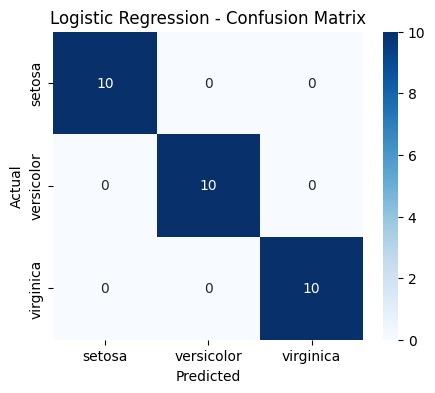

Support Vector Machine Accuracy: 93.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



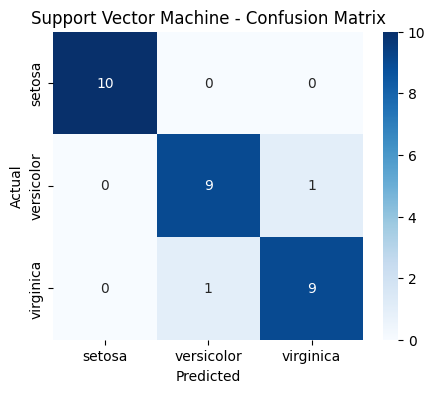

K-Nearest Neighbors Accuracy: 93.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



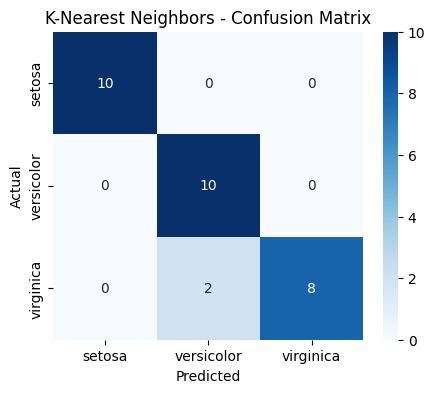

Random Forest Accuracy: 96.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



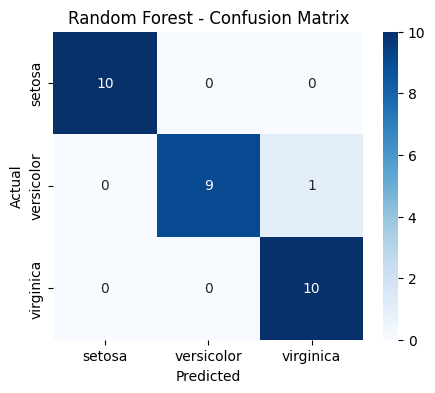

In [12]:
# Evaluate models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
